# Lab 2: CIFAR-10 Challenge

In this lab you will experiment with whatever ConvNet architecture/design you'd like on [CIFAR-10 image dataset](https://www.cs.toronto.edu/~kriz/cifar.html). 

## Part 1: Creating the network (50% of grade)

**Goal:** After training, your model should achieve **at least 80%** accuracy on a **validation** set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

**Data split** The training set should consist of 40000 images, the validation set should consist of 10000 images, and the test set should consist of the remaining 10000 images. **Please use the Keras `load_data()` function to import the data set.**

**Implementation** All code should be in Keras/python. 

### Some things you can try:
- Different number/type of layers
- Different filter sizes 
- Adjust the number of filters used in any given layer
- Try various pooling strategies
- Consider using batch normalization
- Explore different numbers of layers in your network
- Check if adding regularization helps
- Consider alternative optimizers
- Try different activation functions


### Tips for training
When building/tuning your model, keep in mind the following points: 

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within a few hundred iterations (usually within one epoch)
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer one validation to to cross-validation 
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model

### What to provide

The cell below should contain all the code necessary to run your final network on the cifar10 dataset as contained within Keras. All necessary hyperparameters should be visible either in the code or through comments. Your code should include 2 plots: one for training and validation loss per epoch and one for training and validation accuracy per epoch.  

Your network should produce an accuracy of at least 80% on the validation set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

You should also evaluate and report the accuracy on the test set. The test set should be used only once. That is, after you have decided on what to include in your network and tuned any hyperparameters for your final network, you should use this final network on the test set and calculate the accuracy.  

**Please make sure that all code has been run and the output is visible in the notebook before submitting.**

**Please note that I should be able to run the single code cell below and reproduce your results.**

**All code should be in ONE code cell.**

Epoch 1/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7037 - accuracy: 0.3877 - val_loss: 1.5525 - val_accuracy: 0.4565
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1787 - accuracy: 0.5849 - val_loss: 0.9560 - val_accuracy: 0.6538
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9676 - accuracy: 0.6658 - val_loss: 0.9227 - val_accuracy: 0.6778
Epoch 4/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.8553 - accuracy: 0.7059 - val_loss: 1.0256 - val_accuracy: 0.6624
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7810 - accuracy: 0.7335 - val_loss: 0.7892 - val_accuracy: 0.7305
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7147 - accuracy: 0.7566 - val_loss: 0.8037 - val_accuracy: 0.7345
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 0.6562 - accuracy: 0.7796 - val_loss: 0.6737 -

Epoch 1/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6148 - accuracy: 0.4171 - val_loss: 1.6299 - val_accuracy: 0.4255
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1291 - accuracy: 0.5999 - val_loss: 1.2776 - val_accuracy: 0.5922
Epoch 3/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9427 - accuracy: 0.6762 - val_loss: 0.9400 - val_accuracy: 0.6759
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8268 - accuracy: 0.7184 - val_loss: 0.7464 - val_accuracy: 0.7448
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7422 - accuracy: 0.7478 - val_loss: 0.7326 - val_accuracy: 0.7495
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6806 - accuracy: 0.7702 - val_loss: 0.8764 - val_accuracy: 0.7183
Epoch 7/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6208 - accuracy: 0.7908 - val_loss: 0.7611 - val_ac

INFO:tensorflow:Oracle triggered exit
Selecting the best model from the trail
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 48)        24624     
____________________________________________

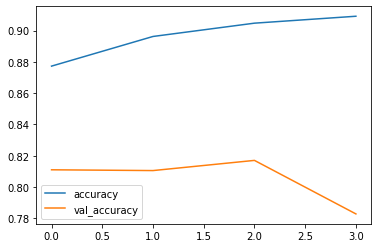

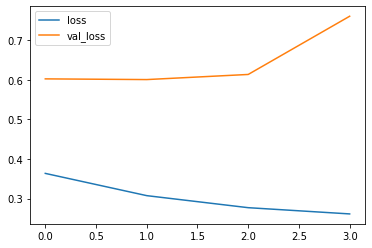

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
!pip install keras-tuner
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train.shape
X_train.shape
X_train_1=X_train
y_train_1=y_train
X_train_1.shape

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


# To convert pixel values in the range of 0 and 1 Just run one time
X_train=X_train/255.0
X_train_1=X_train_1/255.0
X_test =X_test/255.0
X_val=X_val/255.0

y_cat_train=to_categorical(y_train,10) #10 for 10 classes
y_cat_train_1=to_categorical(y_train_1,10) #10 for 10 classes

y_cat_test=to_categorical(y_test)
y_cat_val=to_categorical(y_val)

# Building Model implemented 

def build_model(hp):  
  model = keras.Sequential([
                            # Convolutional LAYER 1
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,4]),
        activation='relu',
        padding='same',
        input_shape=(32,32,3)
    ),
    keras.layers.BatchNormalization(),
    
              # Convolutional LAYER 2
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,4]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=2 ),
          # Convolutional LAYER 3
    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,4]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),    
    

        # Convolutional LAYER 4
    keras.layers.Conv2D(
        filters=hp.Int('conv_4_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_4_kernel', values = [3,4]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2 ),
    
              # Convolutional LAYER 5
    keras.layers.Conv2D(
        filters=hp.Int('conv_5_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_5_kernel', values = [3,4]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),

          # Convolutional LAYER 6
    keras.layers.Conv2D(
        filters=hp.Int('conv_6_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_6_kernel', values = [3,4]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2 ),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    
    #Added Dense Fully connected network Layer
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=64, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    
    #As our Output is of 10 classes so the number of neuron in our last dense layer should be 10
    keras.layers.Dense(10, activation='softmax')
  ])
  
    
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


tuner_search1=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=2,
                          directory='output55',
                          project_name="LAB2_DAB300")
# Increment directory value by one number e.g., 'output 55' in next runs to enable new directory for each run and store model statistics 


tuner_search1.search(X_train_1,y_cat_train_1,epochs=10,validation_split=0.2)

#Picking up the best model from the trail

print("Selecting the best model from the trail")

model=tuner_search1.get_best_models(num_models=1)[0]
model.summary()

#Early Stopping is used to stop  training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

#####Fitting The Model##################


model1 =model.fit(X_train_1, y_cat_train_1,batch_size=96, epochs = 20, validation_split=0.2,callbacks=[early_stop])

# loss and accuracy list for traning and validation

metrics=pd.DataFrame(model1.history)
metrics

# Accuracy plot for traning and validation data
print(metrics.columns)
print("Training Accuracy vs Validation Accuracy")
print('\n')
metrics[['accuracy','val_accuracy']].plot()



# Loss plot for traning and validation data
print(metrics.columns)
print('\n')
print("Training loss vs Validation loss")
print('\n')
metrics[['loss','val_loss']].plot()

#########Evaluation of Test Accuracy ####################################



test_loss,test_acc=model.evaluate(X_test,y_cat_test,verbose=0)

print('\n')

print("Test Accuracy",test_acc)

Part 2: Describe What you did (50% of grade)
All the work you did leading up to your final model from Part 1 should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in Part 1. You should write an explanation of what you did and how you made decisions. Upon reading this section I should understand the reasoning that lead you to your final model. All references should be included in the noted section below.

See this guide for how to format markdown cells in Jupyter notebooks. For instance, it may be convenient to report your results in table format.

Type Markdown and LaTeX: 𝛼2
References
Please include all references used in completing this lab: books, tutorials, blogs, github, etc.

Reference details and link: 
Reference details and link: 

**Step1:** Importing required libraries and  installing keras tuner

**Step2:** Splitting the CIFAR10 data in required rows for traning, test and validation splits

**Step 3:** Dividing data(X) by 255 to scale the data to a standard format within range of 0 to 1
And convert the labels(y) to categorical values from 0 to 9 where each number denotes a one hot encoded specific class

**Step 4:** The designed CNN model contains the following blocks structurally

1.  6 convolution layers - Each has below sub filters from keras tuner

> 

*   **Keras tuner filter selector** to select number of filters from the range of (32-64) by doing iteration
*   **Keras tuner filter_size** To selects best filter size to be used for that particular convolutional layer by selecting kernel size (between 3,4) 
*   'RELU' Activation function
*   Padding = 'same': Implements padding surrounding the image
*   Batch Normalization- To normalize the output of a convolution layer's mean values close to zero and standard deviation within 1 to avoid large differences in output parameters
*   Max Pool layer after every 2 convolutional layers of pool size 2 (total of 3 in the network)
*   One Drop out layer of 0.2  to randomly drop 20% of neurons in the applied layer .

2.   One Fully Connected Neural Network

*   **Keras tuner  Neuron selector** to select best number of neurons in range of 64 to 256
*   'RELU' Activation function
*   Batch Normalization 
*   One Drop out layer of 0.5(to randomly drop 50% of neurons in the applied layer) at the last convolution layer
*   second dense layer of 10 neurons
*   'softmax' activation

3.   Compile

*   **keras tuner learning rate selector** to select learning rate between 0.001 and 0.003
*   Loss = categorical_crossentropy to deal with one hot encoded  2 dimentional Image labels which are mutually exclusive in nature. 
*   Metrics = accuracy this is used to monitor train accuracy

**Keras Tuner ** - We have implemented Keras Tuner for tuning hyperParameter such as number of filter, filter size, Number of neurons in dense layer and learning rate of optimizer to gain best validation Accuracy.For that we built one function named build_model.


**Step 5:** Best hyper parameters selection using Random search function in keras tuner.This Function is used to execute our modelfunction
*   This step uses as predefined function function "RandomSearch" with parameters.This function performs the iteration loop, which evaluates a certain number of hyperparameter combinations as output

1.   Model which is referred/chosen to predict( model_built function above in step 4)
2.   objective; 'val_accuracy' ( validation accuracy is parameter of examination)
3. Max trails: number of trails to carry out this random search validation
4. directory : temporary allocation of code block to store the results
5. project_name : Name of the project

**Step 6:**Upon above function execution derive parameters for the network to acheive best performance and assign the model to the variable

**Step 7:**fit the model to the data enabling early stopping

*  Early Stopping: Functionality to observe saturation of learning by the model on the data and stop at the best validation and traning accuracy

**Step 8:**Demographics and plots

*   Derive list of accuracies and loss for traning and validation acquired from above fit's epochs.
*   derive line plot for losses and accuracies for traning and validation data

**Step 9:**Test Data Accuracy

*  Evaluate the model accuracy for Test Data 

**Achieved a validation accuracy of 81.09% and test accuracy of 80%**

**Reference Links:**
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner

**Project By**
Siddhesh Dwarkanath Munagekar: 0747944,
Chaitanya Dutt M V : 0749773 ,






















   















           